In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Explit method vs Implicit Method 

In [2]:
def exp(y,h):
    return(((-2*h + 1)*y )-3*h )

def imp(y,h):
    return((y - (3*h))/ (2*h + 1))
def compare(h, N):
    Y1=[0, ]
    Y2=[0, ]
    T=np.array(np.linspace(0, h*N, N+1))
    for i in range (N):
        y1 = Y1[i]
        y2 = Y2[i]
        Y1.append(exp(y1, h))
        Y2.append(imp(y2, h))
        
    A=[]
    for i in T:
        A.append(2.5 * m.exp(-2*i) - 1.5)
        
    plt.figure()
    plt.plot(T, Y1, label='Explicit Method')
    plt.plot(T, A, label='Analytical')
    plt.legend()
    plt.show
    
    plt.figure()
    plt.plot(T, Y2, label='Implicit Method')
    plt.plot(T, A, label='Analytical')
    plt.legend()
    plt.show
    
    

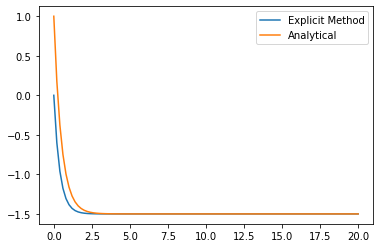

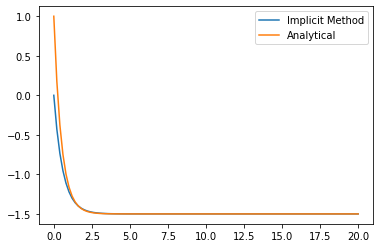

In [3]:
compare(0.2, 100)

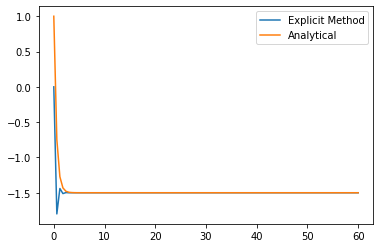

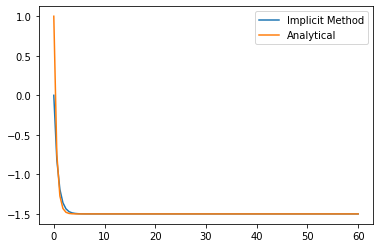

In [4]:
compare(0.6, 100)

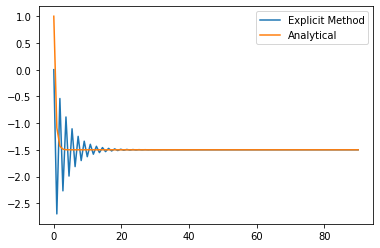

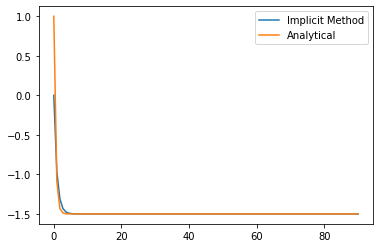

In [5]:
compare(0.9, 100)

# Heat Equation Explicit Method

In [6]:
def Amatrix(sigma, N):
    A= [[0 for i in range(N)]for i in range(N)]
    s = sigma
    for i in range(N):
        if(i == 0 or i == N-1):
            A[i][i] = 1     
            
        else:
            A[i][i-1]  = s
            A[i][i]    = 1-2*s
            A[i][i+1]  = s
            
    return(A)
    
def matrixmul(u, A, N):
    unext = [0 for i in range(N)]
    for i in range(N):
        for j in range(N):
            unext[i]=unext[i]+u[j]*A[i][j]
    return(unext)


In [7]:
def tempprofile(hx, ht, k, N, u):
    U = [u,]
    sigma = (k*ht)/(hx**2)
    A = Amatrix(sigma, N)
    
    for i in range (N):
        unext = matrixmul(u, A, N)
        U.append(unext)
        u = unext
    return(U)

In [8]:
def Contour(hx, ht, k, N, u0, uN):
    u=[0 for i in range(N)]
    u[0]=u0
    u[N-1]=uN
    U = tempprofile(hx, ht, k, N, u)
    T = np.array(np.linspace(0, 100, N))
    L = np.array(np.linspace(0, 10, N))   
    plt.figure()
    plt.title("Temparature profile vs length")
    for i in U:
        plt.plot(L,i)
    return(U)

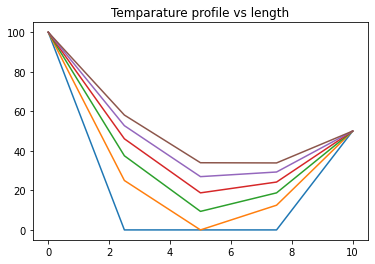

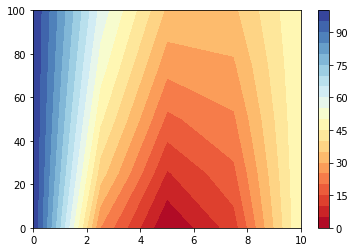

In [9]:
#sigma = 0.25
U=Contour(2, 1, 1, 5, 100, 50)
T = np.array(np.linspace(0, 100, 5))
L = np.array(np.linspace(0, 10, 5))
U.pop(0)
plt.figure()
plt.contourf(L, T, U, 20, cmap='RdYlBu')
plt.colorbar();

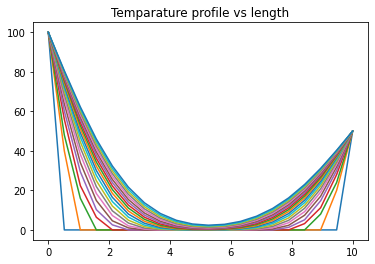

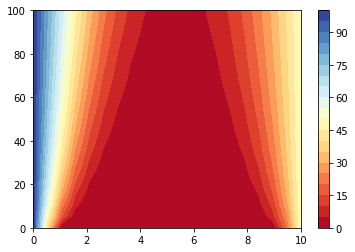

In [10]:
#sigma = 0.4
U=Contour(0.5, 0.1, 1, 20, 100, 50)
T = np.array(np.linspace(0, 100, 20))
L = np.array(np.linspace(0, 10, 20))
U.pop(0)
plt.figure()
plt.contourf(L, T, U, 20, cmap='RdYlBu')
plt.colorbar();

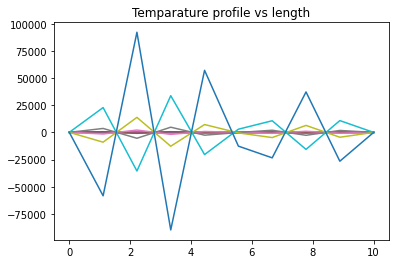

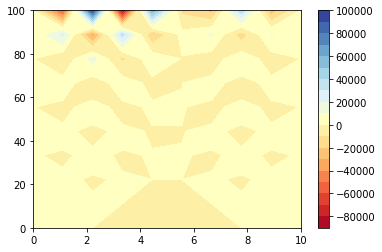

In [11]:
#sigma = 1
U=Contour(1, 1, 1, 10, 100, 50 )
T = np.array(np.linspace(0, 100, 10))
L = np.array(np.linspace(0, 10, 10))
U.pop(0)
plt.figure()
plt.contourf(L, T, U, 20, cmap='RdYlBu')
plt.colorbar();

# Heat Equation Implicit Method

In [12]:
def A_matrix(sigma, N):
    A= [[0 for i in range(N)]for i in range(N)]
    s = sigma
    for i in range(N):
        if(i == 0 or i == N-1):
            A[i][i] = 1     
            
        else:
            A[i][i-1]  = -s
            A[i][i]    = 1+2*s
            A[i][i+1]  = -s
            
    return(np.linalg.inv(A))

def matrixmul(u, A, N):
    unext = [0 for i in range(N)]
    for i in range(N):
        for j in range(N):
            unext[i]=unext[i]+u[j]*A[i][j]
    return(unext)

def temp_profile(hx, ht, k, N, u):
    U = [u,]
    sigma = (k*ht)/(hx**2)
    A = A_matrix(sigma, N)
    
    for i in range (N):
        unext = matrixmul(u, A, N)
        U.append(unext)
        u = unext
    return(U)

def Contour2(hx, ht, k, N, u0, uN):
    u=[0 for i in range(N)]
    u[0]=u0
    u[N-1]=uN
    U = temp_profile(hx, ht, k, N, u)
    T = np.array(np.linspace(0, 100, N))
    L = np.array(np.linspace(0, 10, N))   
    plt.figure()
    plt.title("Temparature profile vs length")
    for i in U:
        plt.plot(L,i)
    return(U)

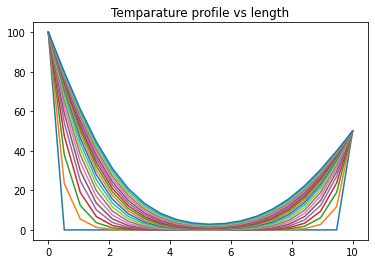

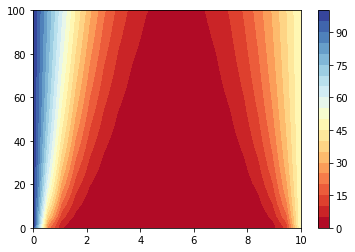

In [13]:
#sigma = 0.4
U=Contour2(0.5, 0.1, 1, 20, 100, 50)
T = np.array(np.linspace(0, 100, 20))
L = np.array(np.linspace(0, 10, 20))
U.pop(0)
plt.figure()
plt.contourf(L, T, U, 20, cmap='RdYlBu')
plt.colorbar();

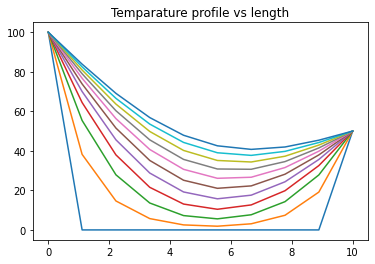

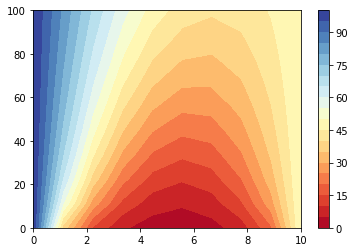

In [26]:
#sigma = 1
U=Contour2(1, 1, 1, 10, 100, 50 )
T = np.array(np.linspace(0, 100, 10))
L = np.array(np.linspace(0, 10, 10))
U.pop(0)
plt.figure()
plt.contourf(L, T, U, 20, cmap='RdYlBu')
plt.colorbar();

# Laplace Equation

In [15]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method
import numpy as np
import matplotlib.pyplot as plt

def contour_2d(lenX, lenY, delta):
    #lenX = lenY = 100 
    #delta = 5
    Ttop = 100
    Tbottom = -100
    Tleft = 0
    Tright = 0
    Tguess = 30
    colorinterpolation = 50
    colourMap = plt.cm.jet
    X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
    T = np.empty((lenX, lenY))
    T.fill(Tguess)
    T[(lenY-1):, :] = Ttop
    T[:1, :] = Tbottom
    T[:, (lenX-1):] = Tright
    T[:, :1] = Tleft
    e=1/10**4
    c=0
    calc=0
    condition = True
    E=[]
    while condition:
        for i in range(1, lenX-1, delta):
            for j in range(1, lenY-1, delta):
                val = T[i, j]
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
                valnew = T[i, j]
                error = np.abs(valnew - val)
                condition = error > e
                calc=calc+1      
        c=c+1
    plt.title("Contour of Temperature")
    plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    plt.show()
    print("The total number of calculations are ", calc)
    return(c)


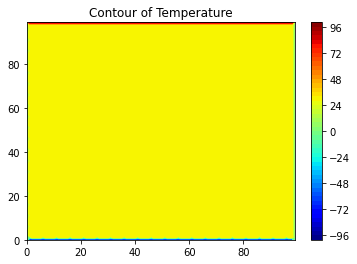

The total number of calculations are  400
The total iterations are 1


In [16]:
c=contour_2d(100, 100, 5)
print("The total iterations are",c)

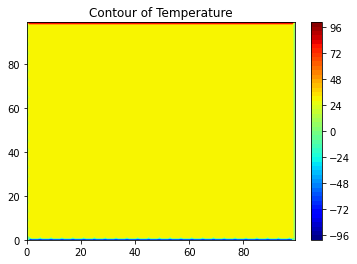

The total number of calculations are  625
The total iterations are 1


In [17]:
c=contour_2d(100, 100, 4)
print("The total iterations are",c)

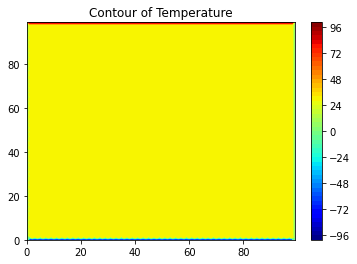

The total number of calculations are  2401
The total iterations are 1


In [18]:
c=contour_2d(100, 100, 2)
print("The total iterations are",c)

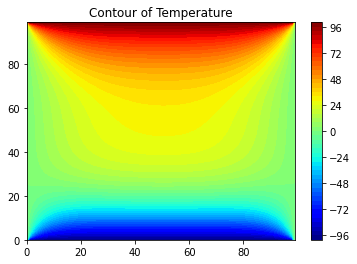

The total number of calculations are  3351796
The total iterations are 349


In [19]:
c=contour_2d(100, 100, 1)
print("The total iterations are",c)